0       5.0
1       5.0
2       5.0
3       5.0
4       3.0
       ... 
2530    5.0
2531    5.0
2532    5.0
2533    4.0
2534    5.0
Name: rating, Length: 2535, dtype: float64
parent_asin                   B005AL5H9S  B009GPP546  B00O2FGBJS  B00TK0VV68  \
user_id                                                                        
AE23ZBUF2YVBQPH2NN6F5XSA3QYQ         NaN         NaN         NaN         NaN   
AE3335XF4PMHSXKTW5B7N7EALG3Q         NaN         NaN         NaN         NaN   
AE3KLVXGZPANXE5XLXYKHTVAZ3FQ         NaN         NaN         NaN         NaN   
AE3LUVAAITFJIUTWBMRPHDQOCOFQ         NaN         NaN         NaN         NaN   
AE3PLZHW6NXWBMZ76TDVFQG2MJFA         NaN         NaN         NaN         NaN   
...                                  ...         ...         ...         ...   
AHX2B4DEER2QR3IU3CCNB3CWC6TA         NaN         NaN         NaN         NaN   
AHXL6HSB4XCGSXWTGDHXNFDAMDDA         NaN         NaN         NaN         NaN   
AHY2TURQPNIDXZGH2CMQLZ343

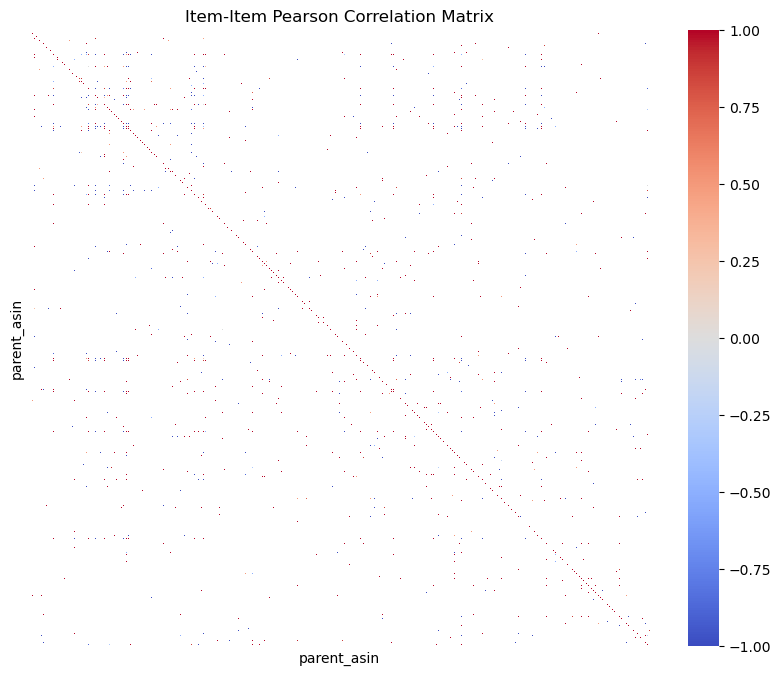

In [33]:
import pandas as pd
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("All_Beauty.csv")  # Replace with your actual file

# Convert timestamp to datetime
data["timestamp"] = pd.to_datetime(data["timestamp"], unit='ms')
data["rating"] = data["rating"].astype(float)
print(data["rating"])
# Create a User-Item matrix
user_item_matrix = data.pivot_table(index="user_id", columns="parent_asin", values="rating")
print(user_item_matrix)
# Function to compute cosine similarity
def cosine_similarity(item1, item2):
    common_users = user_item_matrix[[item1, item2]].dropna()
    if common_users.shape[0] == 0:
        return 0  # No common users, similarity is 0
    return 1 - cosine(common_users[item1], common_users[item2])

# Function to compute Pearson correlation
def pearson_similarity(item1, item2):
    common_users = user_item_matrix[[item1, item2]].dropna()
    if common_users.shape[0] == 0:
        return 0  # No common users, similarity is 0
    return pearsonr(common_users[item1], common_users[item2])[0]

# Compute Pearson correlation matrix
correlation_matrix = user_item_matrix.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5, xticklabels=False, yticklabels=False)
plt.title("Item-Item Pearson Correlation Matrix")
plt.show()

# # Example: Compute similarity between two items
# item1 = "B081TJ8YS3"
# item2 = "B081TJ8YS4"  # Replace with another ASIN

# cos_sim = cosine_similarity(item1, item2)
# pearson_sim = pearson_similarity(item1, item2)

# print(f"Cosine Similarity between {item1} and {item2}: {cos_sim}")
# print(f"Pearson Similarity between {item1} and {item2}: {pearson_sim}")


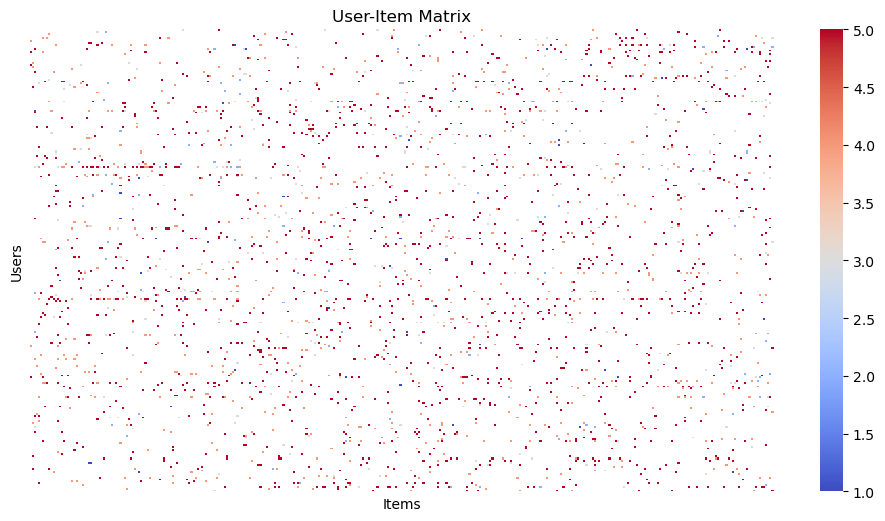

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(user_item_matrix, cmap="coolwarm", cbar=True, xticklabels=False, yticklabels=False)
plt.title("User-Item Matrix")
plt.xlabel("Items")
plt.ylabel("Users")
plt.show()


In [12]:
import pandas as pd
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_json("All_Beauty.jsonl", lines=True)  # Replace with your actual file

# Convert timestamp to datetime
# data["timestamp"] = pd.to_datetime(data["timestamp"], unit='ms')
# data["rating"] = data["rating"].astype(float)
# Create a User-Item matrix
# print(data["categories"].dtypes)
# newdf = data[["parent_asin", "user_id", "rating"]]
# newdf = newdf.groupby("user_id").filter(lambda x: len(x) > 1)
# print(newdf.shape)
# # Example: Compute similarity between two items
# item1 = "B081TJ8YS3"
# item2 = "B081TJ8YS4"  # Replace with another ASIN

# cos_sim = cosine_similarity(item1, item2)
# pearson_sim = pearson_similarity(item1, item2)

# print(f"Cosine Similarity between {item1} and {item2}: {cos_sim}")
# print(f"Pearson Similarity between {item1} and {item2}: {pearson_sim}")


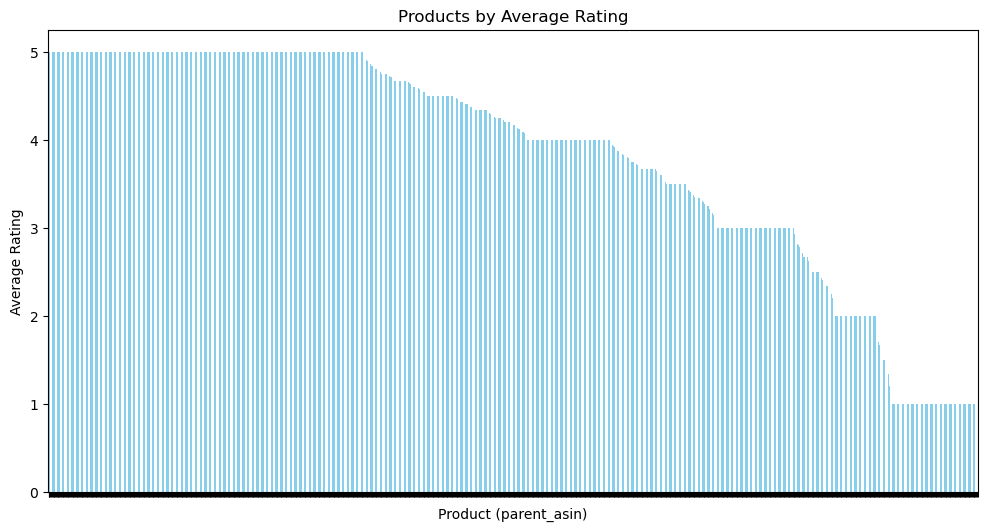

In [31]:
import matplotlib.pyplot as plt
avg_ratings = data.groupby("parent_asin")['rating'].mean()
top_products = avg_ratings.sort_values(ascending=False)
top_products = top_products[0:-1:100]
# Plot
plt.figure(figsize=(12, 6))
top_products.plot(kind="bar", color="skyblue",xticks=None).set_xticklabels([])

plt.xlabel("Product (parent_asin)")
plt.ylabel("Average Rating")
plt.title("Products by Average Rating")
plt.show()


(356,)
count
5     94
6     80
7     66
8     31
9     34
10    23
11    10
12     9
13     6
14     2
15     1
Name: count, dtype: int64


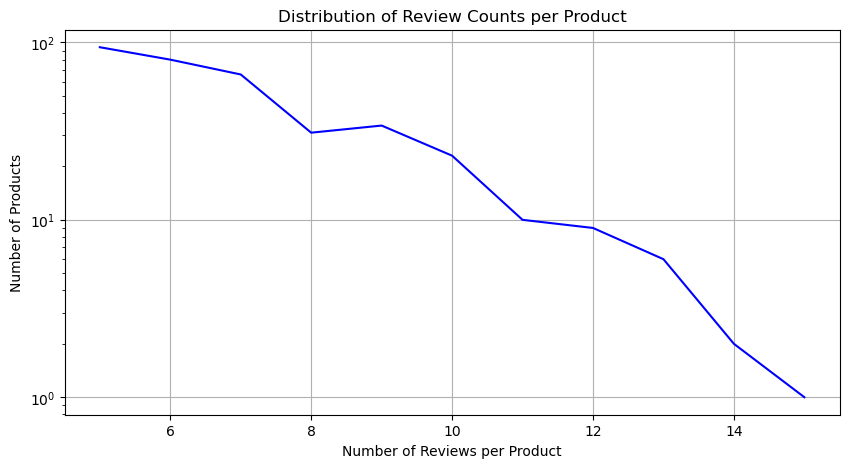

In [34]:
import matplotlib.pyplot as plt

# Count reviews per product
review_counts = data["parent_asin"].value_counts()
print(review_counts.shape)
distribution = review_counts.value_counts().sort_index()
print(distribution)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(distribution.index, distribution.values, color="b")
plt.xlabel("Number of Reviews per Product")
plt.ylabel("Number of Products")
plt.title("Distribution of Review Counts per Product")
plt.yscale("log")  # Log scale to handle large differences
plt.grid()
plt.show()

# # Plot histogram
# plt.figure(figsize=(10, 5))
# plt.hist(review_counts, bins=50, color="skyblue", edgecolor="black")
# plt.xlabel("Number of Reviews per Product")
# plt.ylabel("Frequency (Number of Products)")
# plt.title("Distribution of Review Counts per Product")
# plt.yscale("log")  # Log scale to handle large counts
# plt.show()


In [ ]:
# print(data["categories"])


10000    []
10001    []
10002    []
10003    []
10004    []
10005    []
10006    []
10007    []
10008    []
10009    []
Name: categories, dtype: object


In [ ]:
# print(newdf[0:10])

  parent_asin                       user_id  rating
0  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ     5.0
1  B081TJ8YS3  AGKHLEW2SOWHNMFQIJGBECAF7INQ     4.0
2  B097R46CSY  AE74DYR3QUGVPZJ3P7RFWBGIX7XQ     5.0
3  B09JS339BZ  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ     1.0
4  B08BZ63GMJ  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ     5.0
5  B00R8DXL44  AGMJ3EMDVL6OWBJF7CA5RGJLXN5A     4.0
6  B099DRHW5V  AHREXOGQPZDA6354MHH4ETSF3MCQ     5.0
7  B08BBQ29N5  AEYORY2AVPMCPDV57CE337YU5LXA     3.0
8  B08P2DZB4X  AFSKPY37N3C43SOI5IEXEK5JSIYA     5.0
9  B086QY6T7N  AFSKPY37N3C43SOI5IEXEK5JSIYA     5.0


In [ ]:
# user_item_matrix = newdf.pivot_table(index="user_id", columns="parent_asin", values="rating")
# print(user_item_matrix)
# # Function to compute cosine similarity
# def cosine_similarity(item1, item2):
#     common_users = user_item_matrix[[item1, item2]].dropna()
#     if common_users.shape[0] == 0:
#         return 0  # No common users, similarity is 0
#     return 1 - cosine(common_users[item1], common_users[item2])

# # Function to compute Pearson correlation
# def pearson_similarity(item1, item2):
#     common_users = user_item_matrix[[item1, item2]].dropna()
#     if common_users.shape[0] == 0:
#         return 0  # No common users, similarity is 0
#     return pearsonr(common_users[item1], common_users[item2])[0]

# # Compute Pearson correlation matrix
# correlation_matrix = user_item_matrix.corr(method='pearson')
# print("Pearson Correlation Matrix:")
# print(correlation_matrix)

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5, xticklabels=False, yticklabels=False)
# plt.title("Item-Item Pearson Correlation Matrix")
# plt.show()

/var/folders/y7/6zb3lh693ysb2q51tvdct2bw0000gn/T/ipykernel_55921/4266720656.py:1: PerformanceWarning: The following operation may generate 2196920880 cells in the resulting pandas object.
  user_item_matrix = newdf.pivot_table(index="user_id", columns="parent_asin", values="rating")


: 